# HS4007 Project - Group 15

# **Topic** - Climate Change and Cooperation


**Motivation**

-Game theory offers a lot to whether or not countries decide to engage in 
climate action.

-The “players” end up being the individual countries that try to choose options that would help them secure the best outcomes for themselves.

-They then engage in “games” that embrace the idea of interdependence where the outcomes for the “players” or countries depend on what strategies others act on.

-Climate change can be treated as an iterated game where there is a common-pool resource that is available to everyone. If managed correctly, these resources can sustain and provide value to many parties, but when too much is taken too quickly, the resource can easily be depleted.

-Therefore, the “game” must be set up in a way to reward cooperation and stop individual “players” from free riding from other’s contributions.

-We will try to recreate the results from the paper  "Climate change governance, cooperation and self-organization"

**Context**

The most recent report of the Intergovernmental Panel on Climate Change (IPCC) accumulates evidence that human activity is responsible for most of the Global Warming we have witnessed since the 50s. The recent World summits set up to work out a solution to Global Warming have added up to a (now) long list of unsuccessful attempts to solve the Climate Change problem. Despite  i) the actual risk of collective disaster, ii) the scientific consensus that anthropogenic greenhouse gas (GHG) emissions perturb global climate patterns with negative consequences for many ecosystems and iii) the predictions of early warning signals and severe climate change consequences that are already in place, such as increased occurrence of heat waves and droughts .




**Problem Statement** - *The Game We Cannot Afford to Lose*

We want to use Evolutionary Game Theory to model how a group of N people interact in a Public Goods Game (PGG) where there is an introduced risk factor. We take into account how individual behaviors change over time based on the decisions and achievements of others, which influence one's own decisions. This process is described in the framework of EGT. 
Additionally, we want consider the dynamics of small and finite populations and incorporate spontaneous exploration of possible strategies, which adds to the overall randomness of the process. 


**The Model**

The research paper describes a model where individuals in a population of size N. Each individual has an initial endowment b and is classified as either a Cooperator (C) or a Defector (D) based on their behavior regarding climate issues. Cooperators contribute a fraction cb of their endowment, while Defectors do not contribute anything. The goal is to reach a certain threshold of contributions to the public good             , and if successful, all participants keep their endowments. If the threshold is not met, with a probability of r (the risk of collective disaster), everyone in the group loses their endowment.

  We adopt a dynamical approach, in which individuals revise their strategies through peer-influence, copying others whenever these appear to be more successful. Such social learning (or evolutionary, in the sense of cultural evolution) approach allows policies to change in time as individuals are influenced by the behavior (and achievements) of others, something one actually witnesses in the context of donations to public goods . This also takes into account the fact that agreements may be vulnerable to renegotiation.


The payoff of **D**'s and **C**'s are given by :


$ P ^D(j_C) = b𝛩(j_c - n_{pg}) + (1-r)b(1-𝛩(j_c-n_{ng}))$


$P^C(j_c) = P^D(j_c) -cb $  

# **Code for the Model ->**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [ ]:
c =0.2;
b =10000;

def payoff_defactors(j_c ,n_pg ,r = 0.5 ,b =10000 ):
    return b*np.heaviside(j_c - n_pg ,0) + (1-r)*b*(1 - np.heaviside(j_c -n_pg ,0))

def payoff_cooperators(j_c ,n_pg ,r =0.5 ,b =10000 ):
    return payoff_defactors(j_c ,n_pg) -c*b

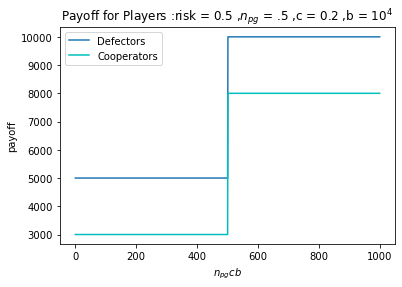

In [ ]:
j_c = np.arange(0 ,1000)
plt.plot(payoff_defactors(j_c ,500 ,0.5) ,label = 'Defectors')
plt.plot(payoff_cooperators(j_c ,500 ,0.5),'c' ,label = 'Cooperators')
plt.title('Payoff for Players :risk = 0.5 ,$n_{pg}$ = .5 ,c = 0.2 ,b = $10^4$ ')
plt.xlabel('$n_{pg}cb$')
plt.ylabel('payoff')
plt.legend()
plt.savefig(f'/home/sachudeva/Documents/jupyter/comp_eco/payoff_plot',transparent = False)
plt.show()

The fitness function used in this code (Different but similar to the paper:

$ f_i = \frac{1}{1+\exp\beta *\text{payoff} }$

In [ ]:

# Set up the transition probabilities
def fermi_prob(beta, delta_fitness ,mu = 0.005):
    """
    Returns the probability of a player switching to a new strategy based on the Fermi rule.
    """
    return (1 - mu) / (1 + np.exp(beta * delta_fitness))


In [ ]:
# Set up the initial population
np.random.seed(1729)
num_players = 1000
strategies = np.random.choice(['C', 'D'], size=num_players)  # randomly assign each player as C or D
fitnesses = np.zeros(num_players)  # initialize fitnesses to 0
j_c= np.count_nonzero(strategies == 'C')  # count the number of players who chose to cooperate
list_c = [];
list_d = [];
# Simulate the game
num_iterations = 1000
beta = 1  # parameter for the Fermi rule

risk = 1
for i in range(num_iterations):
    # Calculate each player's fitness based on their current strategy
    for j in range(num_players):
        # Calculate the total payoff for the player based on their strategy and the strategies of the other players
        if strategies[j] == 'C':
            payoff = payoff_cooperators(j_c ,risk)
        else:
            payoff = payoff_defactors(j_c ,risk)
        fitnesses[j] = 1 / (1 + np.exp(-beta * payoff))  # calculate fitness based on sigmoid function
    
    # Update each player's strategy based on the Fermi rule
    for j in range(num_players):
        k = np.random.randint(num_players)  # randomly choose another player to compare fitness with
        delta_fitness = fitnesses[k] - fitnesses[j]
        p = fermi_prob(beta, delta_fitness)
        if np.random.rand() < p:
            strategies[j] = strategies[k]  # update strategy if new strategy is chosen based on Fermi rule
    j_c= np.count_nonzero(strategies == 'C') 
    list_c.append(j_c)
    list_d.append(num_players-j_c)

    
# Print the final population distribution
print("Final strategy distribution:")
print("C:", (strategies == 'C').sum())
print("D:", (strategies == 'D').sum())


Final strategy distribution:
C: 12
D: 988


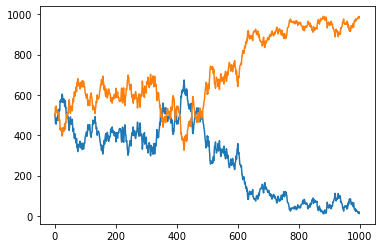

In [ ]:
plt.plot(list_c)
plt.plot(list_d)

In [ ]:
import pandas as pd
n_rolling_period = num_iterations/10

In [ ]:
# Set up the initial population

def game (num_players ,risk ,num_iterations =500,n_pg = 0.5 ,beta =1):
    np.random.seed(1725)
    strategies = np.random.choice(['C', 'D'], size=num_players)  # randomly assign each player as C or D
    fitnesses = np.zeros(num_players)  # initialize fitnesses to 0
    j_c= np.count_nonzero(strategies == 'C')  # count the number of players who chose to cooperate
    pop_list =[];
    for i in range(num_iterations):
        # Calculate each player's fitness based on their current strategy
        for j in range(num_players):
            # Calculate the total payoff for the player based on their strategy and the strategies of the other players
            if strategies[j] == 'C':
                payoff = payoff_cooperators(j_c ,num_players*n_pg ,risk )
            else:
                payoff = payoff_defactors(j_c  ,num_players*n_pg ,risk)
            
            fitnesses[j] = 1 / (1 + np.exp(-beta * payoff))  # calculate fitness based on sigmoid function

        # Update each player's strategy based on the Fermi rule
        for j in range(num_players):
            k = np.random.randint(num_players)  # randomly choose another player to compare fitness with
            delta_fitness = fitnesses[k] - fitnesses[j]
            p = fermi_prob(beta, delta_fitness)
            if np.random.rand() < p:
                strategies[j] = strategies[k]  # update strategy if new strategy is chosen based on Fermi rule
        j_c= np.count_nonzero(strategies == 'C') 
        pop_list.append(j_c)
    print("Final strategy distribution:")
    print("C:", (strategies == 'C').sum())
    print("D:", (strategies == 'D').sum())
    return pop_list
    


In [ ]:
risk_1 = 0.90
num_iter_1 = 3000

In [ ]:
list_c_1000 = pd.Series(game(1000 ,risk_1,num_iter_1))/100

Final strategy distribution:
C: 1000
D: 0


In [ ]:
list_c_2000 = pd.Series(game(2000 ,risk_1 ,num_iter_1))/200

Final strategy distribution:
C: 0
D: 2000


In [ ]:
list_c_5000 = pd.Series(game(5000,risk_1 ,num_iter_1))/500

Final strategy distribution:
C: 3368
D: 1632


**SCALE OF AGREEMENTS**

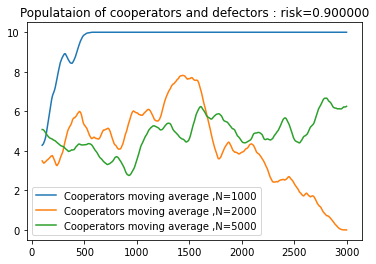

In [ ]:
plt.plot(list_c_1000.rolling(window=100).mean().iloc[10-1:],label = 'Cooperators moving average ,N=1000')

plt.plot(list_c_2000.rolling(window=100).mean().iloc[10-1:],label = 'Cooperators moving average ,N=2000')
plt.plot(list_c_5000.rolling(window=100).mean().iloc[10-1:],label = 'Cooperators moving average ,N=5000')

plt.legend(loc='lower left')
plt.title('Populataion of cooperators and defectors : risk=%f' %risk_1 )
plt.savefig(f'/home/sachudeva/Documents/jupyter/comp_eco/plot_risk90_N102050_1_differenseed')

In [ ]:
list_c_20 = pd.Series(game(200 ,0.40 ,num_iter_1 ,0.9))/200
list_c_80 = pd.Series(game(200 ,0.80 ,num_iter_1 ,0.1))/200

Final strategy distribution:
C: 200
D: 0
Final strategy distribution:
C: 200
D: 0


In [ ]:
list_c = game(1000 ,0.10 ,500)

Final strategy distribution:
C: 1000
D: 0


In [ ]:
list_c = pd.Series(list_c)

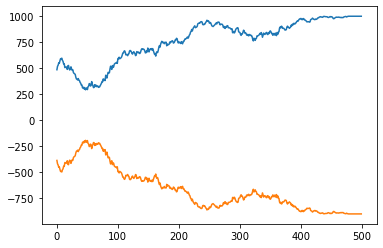

In [ ]:
plt.plot(list_c,label = 'Cooperators moving average ,Z=5')
plt.plot(100-list_c,label = 'Cooperators moving average ,Z=2')

**CONCLUSION**

The paper describes a modeling approach to understanding decision-making processes related to environmental sustainability, with a focus on the uncertainty associated with collective action. The model is based on N-person evolutionary game theory and uses stochastic processes from non-equilibrium statistical mechanics to explore the impact of risk and different types of sanctioning in various configurations, including large and small groups and 
networked populations. The results suggest that the perception of risk plays a crucial role in successful coordination for the global good, and that a decentralized, polycentric, bottom-up approach involving multiple institutions may be better suited for ensuring cooperation and the maintenance of supervising institutions.

The code aims to reproduce the results from existing papers with few changes.


1.   The transition probability is changed such thatt it compare payoff wittth random agent in the population where the orginal function called for pairwise comparison witth all the agents
2.  Also recreated the repeated game with different parameters and notes the "phase transition" of the optimal strategy 
3. We see that even wih the simple model described in he paper and the further simplification the model shows some rich behaviours and provides insights of "complicated" systems 
 

**REFRENCES**
[Climate change governance, cooperation and self-organization](https://doi.org/10.1016/j.plrev.2014.02.003)

### **END**